In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data on Food consumption

In [3]:
key_df = pd.read_excel('Keys.xlsx')
food_consumption = pd.read_csv('RIVM_DNFCS2.csv')

C:\Users\patel\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
food_consumption['Sex'] = food_consumption['Sex'].astype('str')
food_consumption['Age'] = food_consumption['Age'].astype('str')
food_consumption['OtherCharacteristics'] = food_consumption['OtherCharacteristics'].astype('str')
food_consumption['FoodGroups'] = food_consumption['FoodGroups'].astype('str')

In [5]:
key_sex = key_df[['Key_sex','Sex']].dropna()
key_sex.columns = ['Sex','actual_sex']
key_sex['Sex'] = key_sex['Sex'].astype('str')
food_consumption_sex = food_consumption.merge(key_sex,on=['Sex'])

In [6]:
key_age = key_df[['Key_age','Age']].dropna()
key_age.columns = ['Age','actual_age']
key_age['Age'] = key_age['Age'].astype('str')
food_consumption_sex_age = food_consumption_sex.merge(key_age,on=['Age'])

In [7]:
key_edu = key_df[['Key_education','Education']].dropna()
key_edu.columns = ['OtherCharacteristics','actual_education']
key_edu['OtherCharacteristics'] = key_edu['OtherCharacteristics'].astype('str')
food_consumption_sex_age_edu = food_consumption_sex_age.merge(key_edu,on=['OtherCharacteristics'])

In [8]:
key_food = key_df[['Key_food','Food']].dropna()
key_food.columns = ['FoodGroups','Food']
key_food['FoodGroups'] = key_food['FoodGroups'].astype('str')
food_consumption_final = food_consumption_sex_age_edu.merge(key_food,on=['FoodGroups'])

In [9]:
food_consumption_final = food_consumption_final[['actual_sex','actual_age','actual_education','Food','MeanConsumption_1', 
                                                 'P5_2', 'P50_3', 'P95_4','ConsumptionDays_6', 
                                                 'MeanConsumptionOnConsumptionDays_7','P5consdays_8', 'P50consdays_9',
                                                  'P95consdays_10']]
food_consumption_final.columns = ['Sex','Age','Education','Food','MeanConsumption_total','5PercentileConsumption',
                                 '50PercentileConsuption','95PercentileConsumption','ConsumptionDays',
                                 'MeanConsumptiononConsumptionDays','5percentileConsumptiondays',
                                 '50percentileConsumptiondays','95percentileConsumptiondays']

In [11]:
food_consumption_final1 = food_consumption_final.dropna()
food_consumption_final1.to_csv('final_consumption.csv',index=False)

## Data on Socioeconomic indicators of each neighbourhood

In [12]:
buurt_data = pd.read_excel('Hague_cijfers.xlsx',sheet_name='Meest-recent')
#buurt_data.head()
buurt_data = buurt_data[['Naam van het gebied','Soort regio','Codering','Aantal inwoners','Mannen','Vrouwen','0 tot 15 jaar',
                        '15 tot 25 jaar']]
buurt_data.columns = ['Name','type','code','Population','Man','Woman','0 to 15 year','15 to 25 year']
buurt_data = buurt_data.reset_index(drop=True)
wijk = ''
buurt_data['Nearest wijk'] = 'Den Haag'
for i in range (0,len(buurt_data)):
    if (buurt_data.loc[i,'type'] == 'Wijk'):
        wijk = buurt_data.loc[i,'Name']
    buurt_data.loc[i,'Nearest wijk'] = wijk
buurt_data['Wijk no'] = buurt_data['Nearest wijk'].str.split(" ",n=2,expand=True)[1]

In [13]:
hague_primary_rate = '33'
hague_secondary_rate = '36'
hague_tertiary_rate = '31'
education = pd.read_csv('Education.csv')
education['Wijk no'] = education['Wijken'].str.split(" ",n = 1, expand = True)[0]


In [14]:
buurt_data_with_edu = buurt_data.merge(education,on=['Wijk no'])

In [15]:
buurt_data_needed = buurt_data_with_edu[['Name','type','code','Population','Man',
                                       'Woman','0 to 15 year','15 to 25 year','Wijken',
                                       'Opleidingsniveau Laag|2017', 'Opleidingsniveau Middelbaar|2017',
                                       'Opleidingsniveau Hoog|2017']]
buurt_data_needed.columns =['Name','Type','Code','Population','Man','Woman','0 to 15 year','15 to 25 year','Wijken',
                           'Primary education','Secondary education','Tertiary education']

In [16]:
buurt_data_needed['Primary education'] = buurt_data_needed['Primary education'].fillna(hague_primary_rate)
buurt_data_needed['Secondary education'] = buurt_data_needed['Secondary education'].fillna(hague_secondary_rate)
buurt_data_needed['Tertiary education'] = buurt_data_needed['Tertiary education'].fillna(hague_tertiary_rate)
buurt_data_needed['Primary education'].replace({"x":hague_primary_rate}, inplace=True)
buurt_data_needed['Secondary education'].replace({"x":hague_secondary_rate}, inplace=True)
buurt_data_needed['Tertiary education'].replace({"x":hague_tertiary_rate}, inplace=True)

C:\Users\patel\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\patel\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\patel\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [19]:
buurt_data_needed = buurt_data_needed.dropna()
buurt_data_needed['0 to 18 year'] = buurt_data_needed['0 to 15 year'] + 0.3*buurt_data_needed['15 to 25 year']
buurt_data_needed['18 and more'] = buurt_data_needed['Population']-buurt_data_needed['0 to 18 year']
buurt_data_needed['0 to 18 male'] = buurt_data_needed['0 to 18 year']*buurt_data_needed['Man']/buurt_data_needed['Population']
buurt_data_needed['0 to 18 female'] = buurt_data_needed['0 to 18 year'] - buurt_data_needed['0 to 18 male']
buurt_data_needed['18 and more male'] = buurt_data_needed['Man']-buurt_data_needed['0 to 18 male']
buurt_data_needed['18 and more female'] = buurt_data_needed['Woman']-buurt_data_needed['0 to 18 female']

In [20]:
buurt_data_needed['0 to 18 male prim'] = (0.01*(buurt_data_needed['0 to 18 male'])*(buurt_data_needed['Primary education'].astype('float'))).astype(int)
buurt_data_needed['0 to 18 male second'] = (0.01*(buurt_data_needed['0 to 18 male'])*(buurt_data_needed['Secondary education'].astype('float'))).astype(int)
buurt_data_needed['0 to 18 male tert'] = (0.01*(buurt_data_needed['0 to 18 male'])*(buurt_data_needed['Tertiary education'].astype('float'))).astype(int)
buurt_data_needed['0 to 18 female prim'] = (0.01*(buurt_data_needed['0 to 18 female'])*(buurt_data_needed['Primary education'].astype('float'))).astype(int)
buurt_data_needed['0 to 18 female second'] = (0.01*(buurt_data_needed['0 to 18 female'])*(buurt_data_needed['Secondary education'].astype('float'))).astype(int)
buurt_data_needed['0 to 18 female tert'] = (0.01*(buurt_data_needed['0 to 18 female'])*(buurt_data_needed['Tertiary education'].astype('float'))).astype(int)
buurt_data_needed['18 and more male prim'] = (0.01*(buurt_data_needed['18 and more male'])*(buurt_data_needed['Primary education'].astype('float'))).astype(int)
buurt_data_needed['18 and more male second'] = (0.01*(buurt_data_needed['18 and more male'])*(buurt_data_needed['Secondary education'].astype('float'))).astype(int)
buurt_data_needed['18 and more male tert'] = (0.01*(buurt_data_needed['18 and more male'])*(buurt_data_needed['Tertiary education'].astype('float'))).astype(int)
buurt_data_needed['18 and more female prim'] = (0.01*(buurt_data_needed['18 and more female'])*(buurt_data_needed['Primary education'].astype('float'))).astype(int)
buurt_data_needed['18 and more female second'] = (0.01*(buurt_data_needed['18 and more female'])*(buurt_data_needed['Secondary education'].astype('float'))).astype(int)
buurt_data_needed['18 and more female tert'] = (0.01*(buurt_data_needed['18 and more female'])*(buurt_data_needed['Tertiary education'].astype('float'))).astype(int)


In [21]:
clustered_data = buurt_data_needed[['Name','Type','Code','Population','0 to 18 male prim', '0 to 18 male second', '0 to 18 male tert',
                                    '0 to 18 female prim', '0 to 18 female second', '0 to 18 female tert',
                                    '18 and more male prim', '18 and more male second',
                                    '18 and more male tert', '18 and more female prim',
                                    '18 and more female second', '18 and more female tert']]
clustered_data.to_csv('clustered_data.csv',index=False)

## Merging food consumtpion and socioeconomic indicator data

In [24]:
food = pd.read_csv('final_consumption.csv')
buurt_data = pd.read_csv('clustered_data.csv')


In [25]:
food_consumed_each_buurt = pd.DataFrame(columns=['Name','Type','code','Population','Food','Amount per day'])
value = 0
for specific_foods in (food['Food'].unique()):
    male_prim_1to18_con=food.loc[(food['Sex']=='Male') & (food['Education']=='Education: lower') & (food['Age']=='1 to 18 years') & (food['Food']==specific_foods),'MeanConsumption_total'].reset_index(drop=True)[0]
    male_sec_1to18_con=food.loc[(food['Sex']=='Male') & (food['Education']=='Education: intermediate') & (food['Age']=='1 to 18 years') & (food['Food']==specific_foods),'MeanConsumption_total'].reset_index(drop=True)[0]
    male_tert_1to18_con=food.loc[(food['Sex']=='Male') & (food['Education']=='Education: higher') & (food['Age']=='1 to 18 years') & (food['Food']==specific_foods),'MeanConsumption_total'].reset_index(drop=True)[0]
    female_prim_1to18_con=food.loc[(food['Sex']=='Female') & (food['Education']=='Education: lower') & (food['Age']=='1 to 18 years') & (food['Food']==specific_foods),'MeanConsumption_total'].reset_index(drop=True)[0]
    female_sec_1to18_con=food.loc[(food['Sex']=='Female') & (food['Education']=='Education: intermediate') & (food['Age']=='1 to 18 years') & (food['Food']==specific_foods),'MeanConsumption_total'].reset_index(drop=True)[0]
    female_tert_1to18_con=food.loc[(food['Sex']=='Female') & (food['Education']=='Education: higher') & (food['Age']=='1 to 18 years') & (food['Food']==specific_foods),'MeanConsumption_total'].reset_index(drop=True)[0]
    male_prim_18plus_con=food.loc[(food['Sex']=='Male') & (food['Education']=='Education: lower') & (food['Age']=='19 to 79 years') & (food['Food']==specific_foods),'MeanConsumption_total'].reset_index(drop=True)[0]
    male_sec_18plus_con=food.loc[(food['Sex']=='Male') & (food['Education']=='Education: intermediate') & (food['Age']=='19 to 79 years') & (food['Food']==specific_foods),'MeanConsumption_total'].reset_index(drop=True)[0]
    male_tert_18plus_con=food.loc[(food['Sex']=='Male') & (food['Education']=='Education: higher') & (food['Age']=='19 to 79 years') & (food['Food']==specific_foods),'MeanConsumption_total'].reset_index(drop=True)[0]
    female_prim_18plus_con=food.loc[(food['Sex']=='Female') & (food['Education']=='Education: lower') & (food['Age']=='19 to 79 years') & (food['Food']==specific_foods),'MeanConsumption_total'].reset_index(drop=True)[0]
    female_sec_18plus_con=food.loc[(food['Sex']=='Female') & (food['Education']=='Education: intermediate') & (food['Age']=='19 to 79 years') & (food['Food']==specific_foods),'MeanConsumption_total'].reset_index(drop=True)[0]
    female_tert_18plus_con=food.loc[(food['Sex']=='Female') & (food['Education']=='Education: higher') & (food['Age']=='19 to 79 years') & (food['Food']==specific_foods),'MeanConsumption_total'].reset_index(drop=True)[0]
    consumption_list = np.array([male_prim_1to18_con,male_sec_1to18_con,male_tert_1to18_con,
                        female_prim_1to18_con,female_sec_1to18_con,female_tert_1to18_con,
                        male_prim_18plus_con,male_sec_18plus_con,male_tert_18plus_con,
                        female_prim_18plus_con,female_sec_18plus_con,female_tert_18plus_con])
    
    for specific_region in buurt_data['Name'].unique():
        population = buurt_data.loc[buurt_data['Name']== specific_region,'Population'].reset_index(drop=True)[0]
        typeofregion = buurt_data.loc[buurt_data['Name']== specific_region,'Type'].reset_index(drop=True)[0]
        code = buurt_data.loc[buurt_data['Name']== specific_region,'Code'].reset_index(drop=True)[0]
        male_prim_1to18_num = buurt_data.loc[buurt_data['Name']== specific_region,'0 to 18 male prim'].reset_index(drop=True)[0]
        male_sec_1to18_num = buurt_data.loc[buurt_data['Name']== specific_region,'0 to 18 male second'].reset_index(drop=True)[0]
        male_tert_1to18_num = buurt_data.loc[buurt_data['Name']== specific_region,'0 to 18 male tert'].reset_index(drop=True)[0]
        female_prim_1to18_num = buurt_data.loc[buurt_data['Name']== specific_region,'0 to 18 female prim'].reset_index(drop=True)[0]
        female_sec_1to18_num = buurt_data.loc[buurt_data['Name']== specific_region,'0 to 18 female second'].reset_index(drop=True)[0]
        female_tert_1to18_num = buurt_data.loc[buurt_data['Name']== specific_region,'0 to 18 female tert'].reset_index(drop=True)[0]
        male_prim_18plus_num = buurt_data.loc[buurt_data['Name']== specific_region,'18 and more male prim'].reset_index(drop=True)[0]
        male_sec_18plus_num = buurt_data.loc[buurt_data['Name']== specific_region,'18 and more male second'].reset_index(drop=True)[0]
        male_tert_18plus_num = buurt_data.loc[buurt_data['Name']== specific_region,'18 and more male tert'].reset_index(drop=True)[0]
        female_prim_18plus_num = buurt_data.loc[buurt_data['Name']== specific_region,'18 and more female prim'].reset_index(drop=True)[0]
        female_sec_18plus_num = buurt_data.loc[buurt_data['Name']== specific_region,'18 and more female second'].reset_index(drop=True)[0]
        female_tert_18plus_num = buurt_data.loc[buurt_data['Name']== specific_region,'18 and more female tert'].reset_index(drop=True)[0]
        number_list = np.array([male_prim_1to18_num,male_sec_1to18_num,male_tert_1to18_num,
                           female_prim_1to18_num,female_sec_1to18_num,female_tert_1to18_num,
                           male_prim_18plus_num,male_sec_18plus_num,male_tert_18plus_num,
                           female_prim_18plus_num,female_sec_18plus_num,female_tert_18plus_num])
        net_buurt_consumption = np.sum(consumption_list*number_list)
        food_consumed_each_buurt=food_consumed_each_buurt.append({'Name': specific_region, 'Type': typeofregion, 'code': code,'Population':population,'food':specific_foods,'Amount per day':net_buurt_consumption},ignore_index=True)


In [26]:
food_consumed_each_buurt = food_consumed_each_buurt[['Name','Type','code','Population','food','Amount per day']]

In [28]:
food_consumed_each_buurt.head()

Name   Type        code Population  \
0               Wijk 02 Belgisch Park   Wijk    WK051802       8205   
1                       Belgisch Park  Buurt  BU05180271       8205   
2  Wijk 03 Westbroekpark en Duttendel   Wijk    WK051803       1955   
3                       Westbroekpark  Buurt  BU05180373        880   
4                           Duttendel  Buurt  BU05180374       1075   

                            food  Amount per day  
0  01. Potatoes and other tubers        571320.5  
1  01. Potatoes and other tubers        571320.5  
2  01. Potatoes and other tubers        129966.0  
3  01. Potatoes and other tubers         58318.4  
4  01. Potatoes and other tubers         71058.2

In [30]:
codes = pd.read_csv('C:/Users/patel/Thesis/DataCleaning/GivingBuurtCodes/buurt_codes.csv')
codes.rename(columns={'BUURTNAAM':'Name'},inplace=True)
codes = codes[['Name','BUURTCODE']]
food_consumed_each_buurt = food_consumed_each_buurt.merge(codes,on=['Name'],how='inner')
food_consumed_each_buurt.head()

Name   Type        code Population  \
0  Belgisch Park  Buurt  BU05180271       8205   
1  Belgisch Park  Buurt  BU05180271       8205   
2  Belgisch Park  Buurt  BU05180271       8205   
3  Belgisch Park  Buurt  BU05180271       8205   
4  Belgisch Park  Buurt  BU05180271       8205   

                                  food  Amount per day  BUURTCODE  
0        01. Potatoes and other tubers        571320.5         71  
1  0100. Unclassified and other tubers          5396.0         71  
2                       0101. Potatoes        565651.3         71  
3                       02. Vegetables       1120356.6         71  
4                       0200. Unclass.         96257.6         71

In [34]:
food_consumed_each_buurt.to_csv('Foodconsumedperbuurt.csv',index=False)

In [21]:
total_food = pd.DataFrame()
food_per_buurt = pd.read_csv('Foodconsumedperbuurt.csv')
hague_data = pd.read_excel('Hague_cijfers.xlsx',sheet_name='Meest-recent')

In [22]:
food_per_buurt = food_per_buurt.dropna()
i = 0
food_consumed = 0
for buurt in food_per_buurt['Name'].unique():
    total_food.loc[i,'Name'] = buurt
    df = food_per_buurt[food_per_buurt['Name']==buurt]
    df = df.reset_index(drop=True)
    total_food.loc[i,'BUURTCODE'] = df.loc[0,'BUURTCODE']
    total_food.loc[i,'Population'] = df.loc[0,'Population']
    for j in range (0,len(df)):
        if (df.loc[j,'food'][2] == '.'):
            food_consumed = food_consumed + df.loc[j,'Amount per day']
    total_food.loc[i,'food_consumed'] = food_consumed
    food_consumed = 0
    i = i+1

In [35]:
hague_data = hague_data[['Naam van het gebied','Gemiddeld inkomen per inwoner ']]
hague_data.columns = ['Name','Income per capita']
total_food = total_food.merge(hague_data,on=['Name'],how='inner')
total_food['Amount per capita'] = total_food['food_consumed']/total_food['Population']
total_food.to_csv('total_food.csv',index=False)

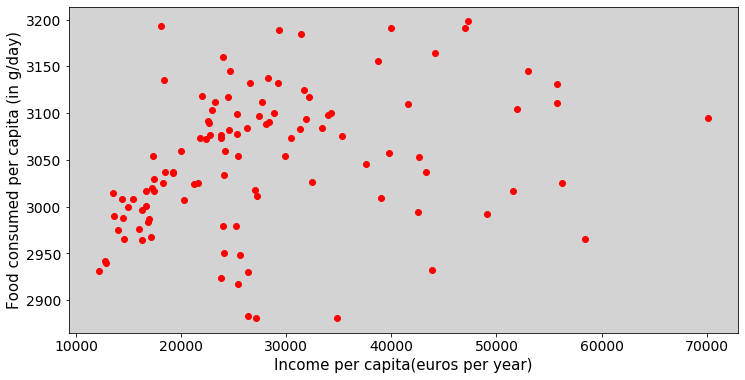

In [34]:
plt.figure(figsize=(12,6))
ax=plt.axes()
plt.scatter(total_food['Income per capita'],total_food['Amount per capita'],color='red')
plt.xlabel('Income per capita(euros per year)',fontsize=15)
plt.ylabel('Food consumed per capita (in g/day)',fontsize=15)
#plt.ylim(0,150)
#plt.xlim(0,150)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_facecolor('lightgray')

In [28]:
total_food['Income per capita'].corr(total_food['Amount per capita'])

0.3140542988145079